In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [5]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [6]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [7]:
#shape of data
df.shape

(9357, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

# Data Cleaning

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [10]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [11]:

print(df.shape)

(9357, 15)


In [12]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [13]:
columns_with_null = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T', 'RH', 'AH']
# Replace -200 with NaN
df[columns_with_null] = df[columns_with_null].replace(-200, np.nan)
column_means = df[columns_with_null].mean()
df[columns_with_null] = df[columns_with_null].fillna(column_means)
df.shape

(9357, 15)

# Data Analysis

In [14]:
df_col = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T', 'RH', 'AH']]

In [15]:
df_col.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


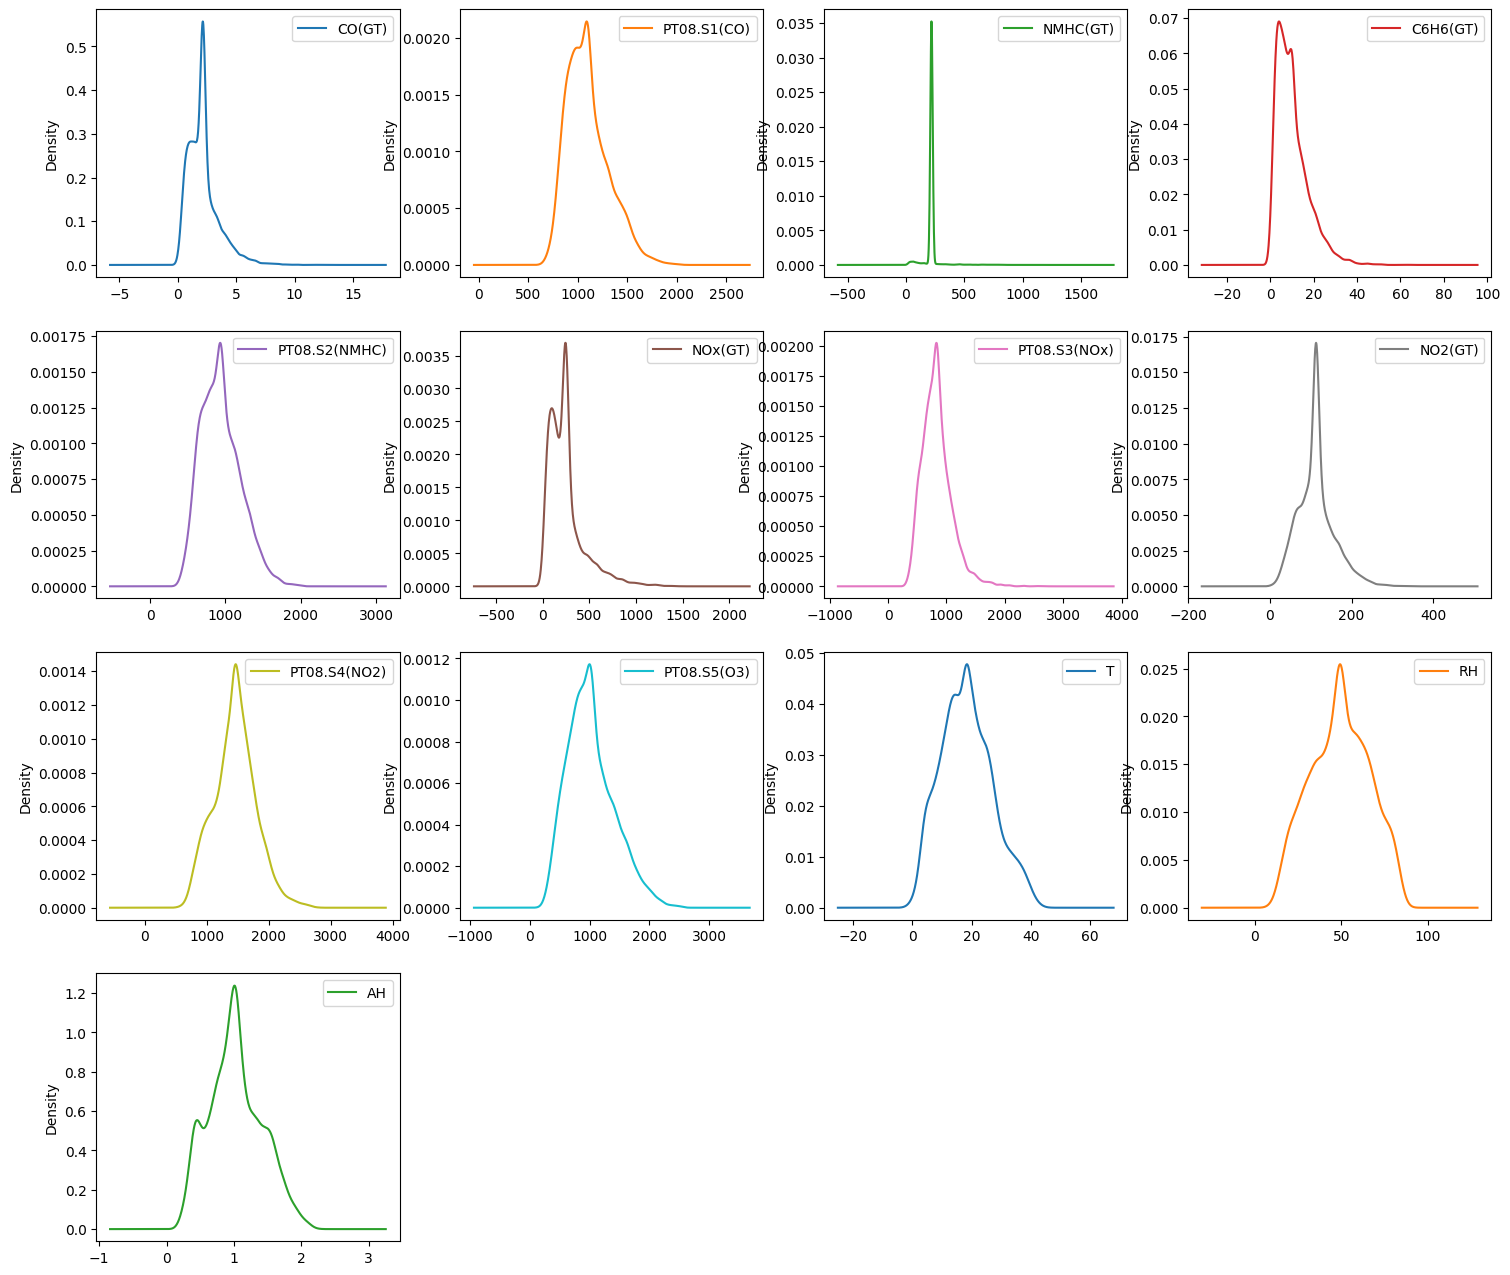

In [16]:
plt.rcParams['figure.figsize'] = [18, 16]
df_col.plot(kind="density", subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

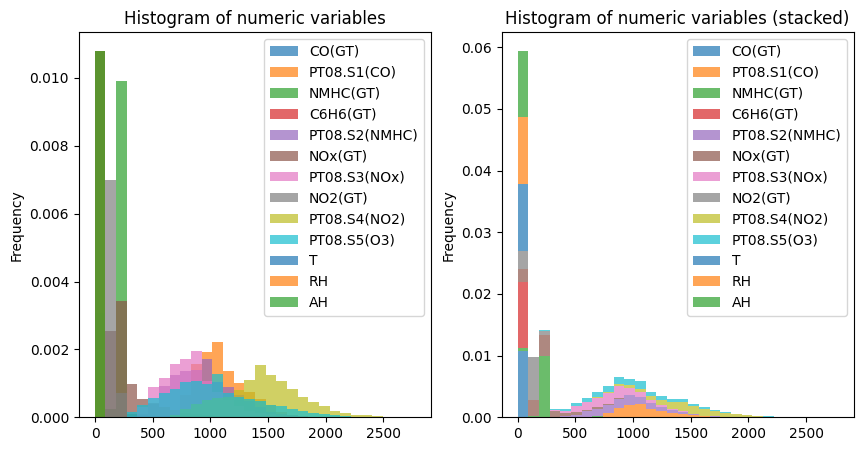

In [17]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
df_col.plot(kind="hist", bins=30, density=True, alpha=0.7, ax=axs[0])
axs[0].set_title('Histogram of numeric variables')
df_col.plot(kind="hist", bins=30, density=True, alpha=0.7, stacked=True, ax=axs[1])
axs[1].set_title('Histogram of numeric variables (stacked)');

In [18]:
#The maximum CO concentration
df.groupby('Date')['CO(GT)'].max().sort_values(ascending=False).head()

Date
2004-11-23    11.9
2004-11-17    10.2
2004-11-26    10.1
2004-12-13     9.9
2004-10-26     9.5
Name: CO(GT), dtype: float64

In [19]:
#The maximum CO concentration per year
df3 =df.set_index('Date').resample("Y")["CO(GT)"].max()
df3.head()

Date
2004-12-31    11.9
2005-12-31     8.7
Freq: A-DEC, Name: CO(GT), dtype: float64

# Statistical Analysis

In [20]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530
std,1.316068,212.796116,63.870229,7.302474,261.557856,193.419417,251.741784,43.911095,339.365351,390.609000,8.658396,16.974308,0.395836
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,941.250000,218.811816,4.591495,742.500000,112.000000,665.500000,85.900000,1241.500000,741.750000,12.025000,36.550000,0.746115
50%,2.152750,1074.500000,218.811816,8.593367,923.250000,229.000000,817.500000,113.075515,1456.143486,982.500000,18.275000,49.232360,1.015441
75%,2.600000,1221.250000,218.811816,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [21]:
corr = df_col.corr()
corr

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.773394,0.289975,0.812392,0.795586,0.762297,-0.613870,0.646528,0.558225,0.759027,0.020260,0.043204,0.043273
PT08.S1(CO),0.773394,1.000000,0.278288,0.883821,0.892972,0.615974,-0.771918,0.562997,0.682874,0.899326,0.048628,0.114607,0.135323
NMHC(GT),0.289975,0.278288,1.000000,0.281923,0.279751,0.098185,-0.261985,0.156549,0.232983,0.240594,0.066809,-0.052794,0.037173
C6H6(GT),0.812392,0.883821,0.281923,1.000000,0.981962,0.616880,-0.735711,0.536178,0.765717,0.865727,0.198891,-0.061643,0.167909
PT08.S2(NMHC),0.795586,0.892972,0.279751,0.981962,1.000000,0.601812,-0.796687,0.561421,0.777235,0.880590,0.241330,-0.090352,0.186906
NOx(GT),0.762297,0.615974,0.098185,0.616880,0.601812,1.000000,-0.563259,0.763133,0.205526,0.688214,-0.235657,0.192578,-0.126831
PT08.S3(NOx),-0.613870,-0.771918,-0.261985,-0.735711,-0.796687,-0.563259,1.000000,-0.569535,-0.538460,-0.796554,-0.145133,-0.056730,-0.232021
NO2(GT),0.646528,0.562997,0.156549,0.536178,0.561421,0.763133,-0.569535,1.000000,0.140940,0.629564,-0.165317,-0.080645,-0.291200
PT08.S4(NO2),0.558225,0.682874,0.232983,0.765717,0.777235,0.205526,-0.538460,0.140940,1.000000,0.591137,0.561333,-0.032188,0.629644
PT08.S5(O3),0.759027,0.899326,0.240594,0.865727,0.880590,0.688214,-0.796554,0.629564,0.591137,1.000000,-0.027193,0.124952,0.070738


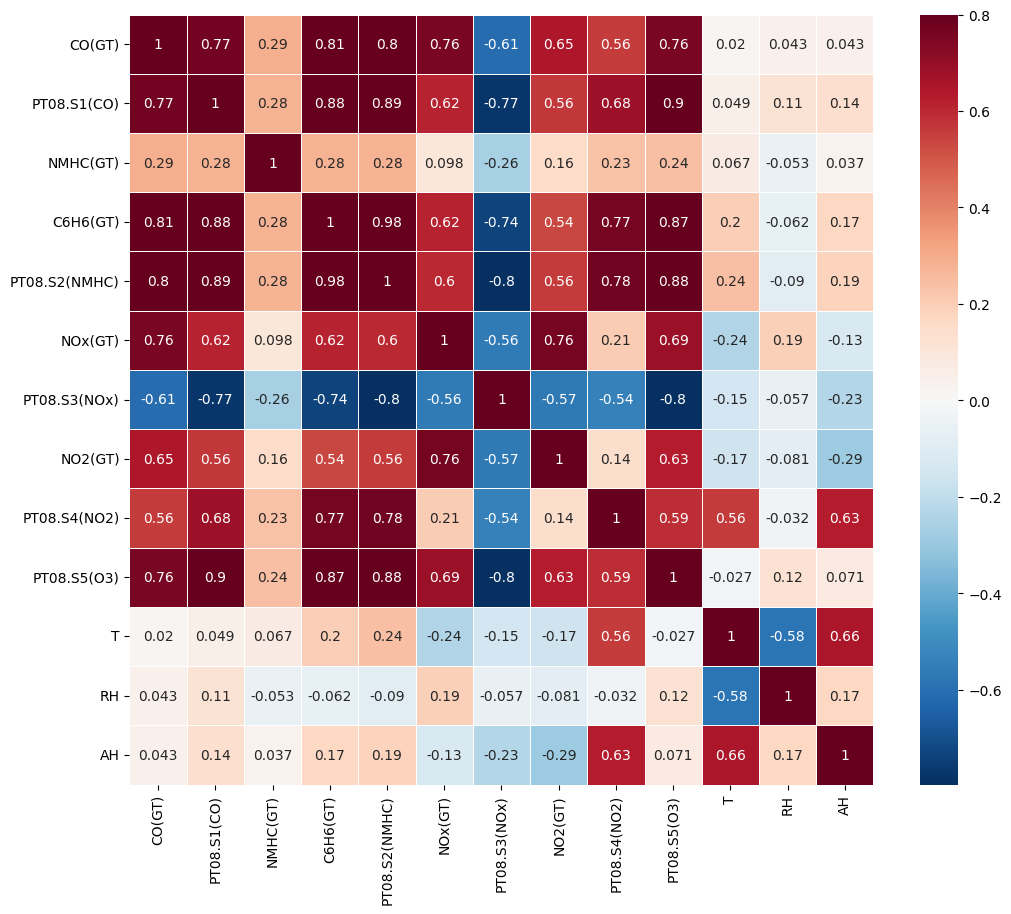

In [22]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, linewidth=0.5, cmap='RdBu_r', vmax=.8)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

plt.show()

# Working with Selected Variable to detect Anamoly

We make analysis for two variables: T (temperature) and RH (Relative Humidity (%)). Only 4 columns will be needed for further analysis: Date, Time, T and RH:

In [23]:
#checking null values
df['RH'].isnull().sum()

0

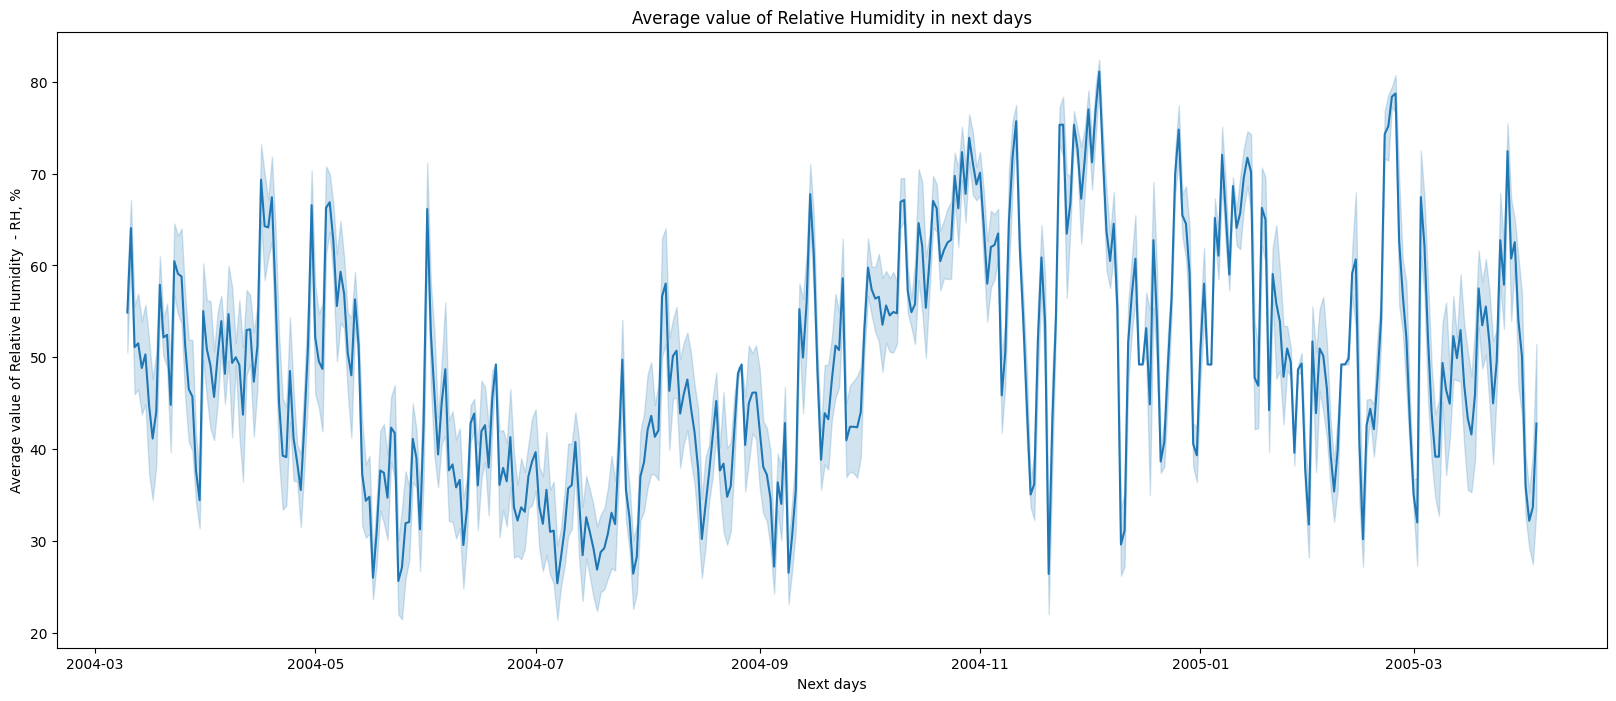

In [24]:
#The average value of Relative Humidity (RH(%)) in next days
fig = plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='RH', data=df)
plt.xlabel('Next days')
plt.ylabel('Average value of Relative Humidity  - RH, %')
plt.title('Average value of Relative Humidity in next days');

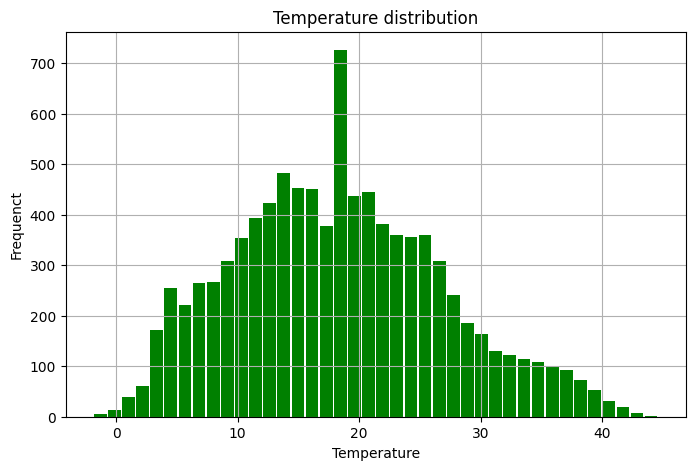

In [25]:
# Temperature Variable Analysis
df["T"].hist(bins = 40, figsize=(8,5), rwidth=0.9, color="green")
plt.xlabel("Temperature")
plt.ylabel("Frequenct")
plt.title("Temperature distribution");

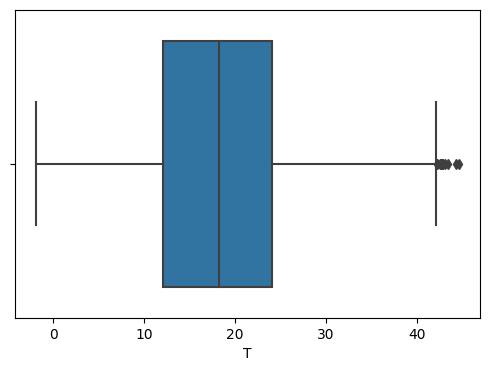

In [26]:
fig = plt.figure(figsize=(6,4))
sns.boxplot(x=df['T']);

The graphs of the 'T' variable show that most of the values in the set are grouped together, and there are also outliers, but with a very low frequency. For the most part, the temperature range is from about 0 to 18 degrees.

In [27]:
df_corr = df[['T', 'RH']]
corr = df_corr.corr()
corr

,T,RH
T,1.000000,-0.578569
RH,-0.578569,1.000000


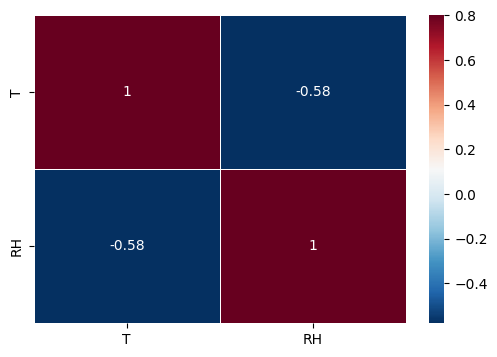

In [28]:
#plotting heat map for better understanding from heat map
plt.figure(figsize=(6,4))
ax = sns.heatmap(corr, annot=True, linewidth=0.5, cmap='RdBu_r', vmax=.8)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

plt.show()

# Outlier Detection and Removal

In this part we will check if the RH variable has any outliers.

One method of finding outliers is the box plot. It is a very simple and effective way to visualize outliers. The box plot is based on a summary of five numbers: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. The lower and upper ranges are the boundaries of the data distribution. Any data points that show above or below the ranges can be considered outliers or anomalies.

Only 4 columns will be needed for further analysis: Date, Time, T and RH:

In [29]:
df_air = df[['Date', 'Time', 'T', 'RH']]
df_air.head()

,Date,Time,T,RH
0,2004-03-10,18:00:00,13.60,48.875001
1,2004-03-10,19:00:00,13.30,47.700000
2,2004-03-10,20:00:00,11.90,53.975000
3,2004-03-10,21:00:00,11.00,60.000000
4,2004-03-10,22:00:00,11.15,59.575001


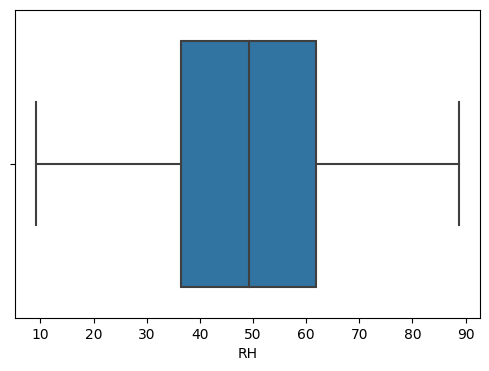

In [30]:
fig = plt.figure(figsize=(6,4))
sns.boxplot(x=df_air ['RH']);

In [31]:
Q1 = df_air ['RH'].quantile(0.25)
Q3 = df_air ['RH'].quantile(0.75)
IQR = Q3 -Q1 
outliers_filter = (df_air ['RH'] < (Q1 - 3.0 * IQR)) |(df_air ['RH'] > (Q3 + 3.0 * IQR))
outliers_filter.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: RH, dtype: bool

In [32]:
no_outlier_filter = ~(outliers_filter).any(axis=0)
no_outlier_filter

True

Inter Quartile Range analysis confirmed that there are not outliers in RH variable which we observed from box plot

# Model Building for Anomaly Detection in Different Features

To check whether the assumption read from the box plot is true, we will perform another analysis of outliers using the Isolation Forest method. It also allows you to detect anomalies in the data.

Isolation Forest detects anomalies solely on the basis that anomalies are few and different data points and is performed without using distance or density measurements. The predict method returns the outliers as 1 for the norm and -1 for the anomaly.

## Isolation Forest

In [33]:
data = df_air['RH'].values.reshape(-1, 1)

In [34]:
outliers_fraction = 0.01

In [35]:
model = IsolationForest(contamination=outliers_fraction)
model.fit(data) 
df_air['outlier'] = pd.Series(model.predict(data))

C:\Users\usman jalil\AppData\Local\Temp\ipykernel_43932\3817008461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['outlier'] = pd.Series(model.predict(data))


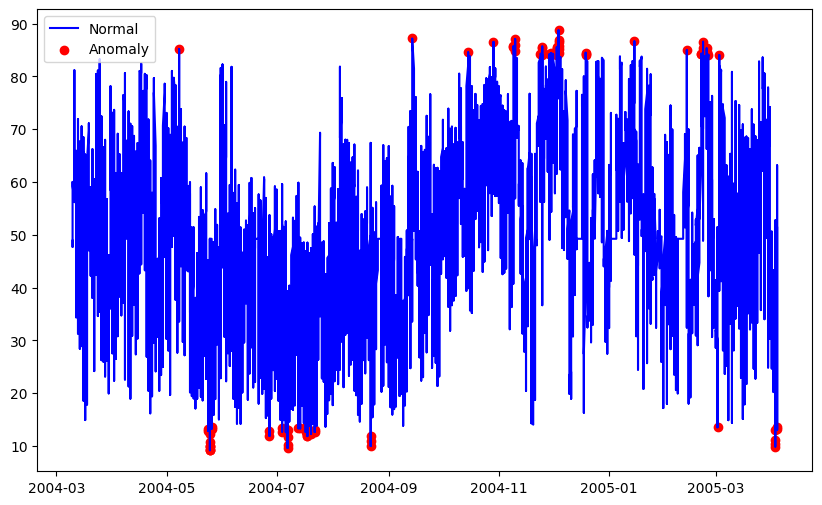

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
a = df_air.loc[df_air['outlier'] == -1, ['Date', 'RH']] 

ax.plot(df_air['Date'], df_air['RH'], color='blue', label = 'Normal')
ax.scatter(a['Date'],a['RH'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

Checking Anomalies in other few Columns

In [37]:
# Select the features to be used for anomaly detection
features = df_col.columns
X = df[features].values
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X)
y_pred1 = model.predict(X)
anomalies = X[y_pred1 == -1]
anomalies

array([[2.15274954e+00, 1.01100000e+03, 1.40000000e+01, ...,
        1.00750000e+01, 6.04749994e+01, 7.46494516e-01],
       [7.00000000e-01, 1.06600000e+03, 8.00000000e+00, ...,
        1.09999998e+01, 5.61750002e+01, 7.36559600e-01],
       [6.90000000e+00, 1.77550000e+03, 4.61000000e+02, ...,
        9.65000010e+00, 6.93000011e+01, 8.31921144e-01],
       ...,
       [5.90000000e+00, 1.72625000e+03, 2.18811816e+02, ...,
        2.00999999e+01, 4.31999998e+01, 1.00511939e+00],
       [7.50000000e+00, 1.81775000e+03, 2.18811816e+02, ...,
        1.88000002e+01, 4.90500002e+01, 1.05376250e+00],
       [5.70000000e+00, 1.67325000e+03, 2.18811816e+02, ...,
        1.93500004e+01, 5.62500010e+01, 1.25001459e+00]])

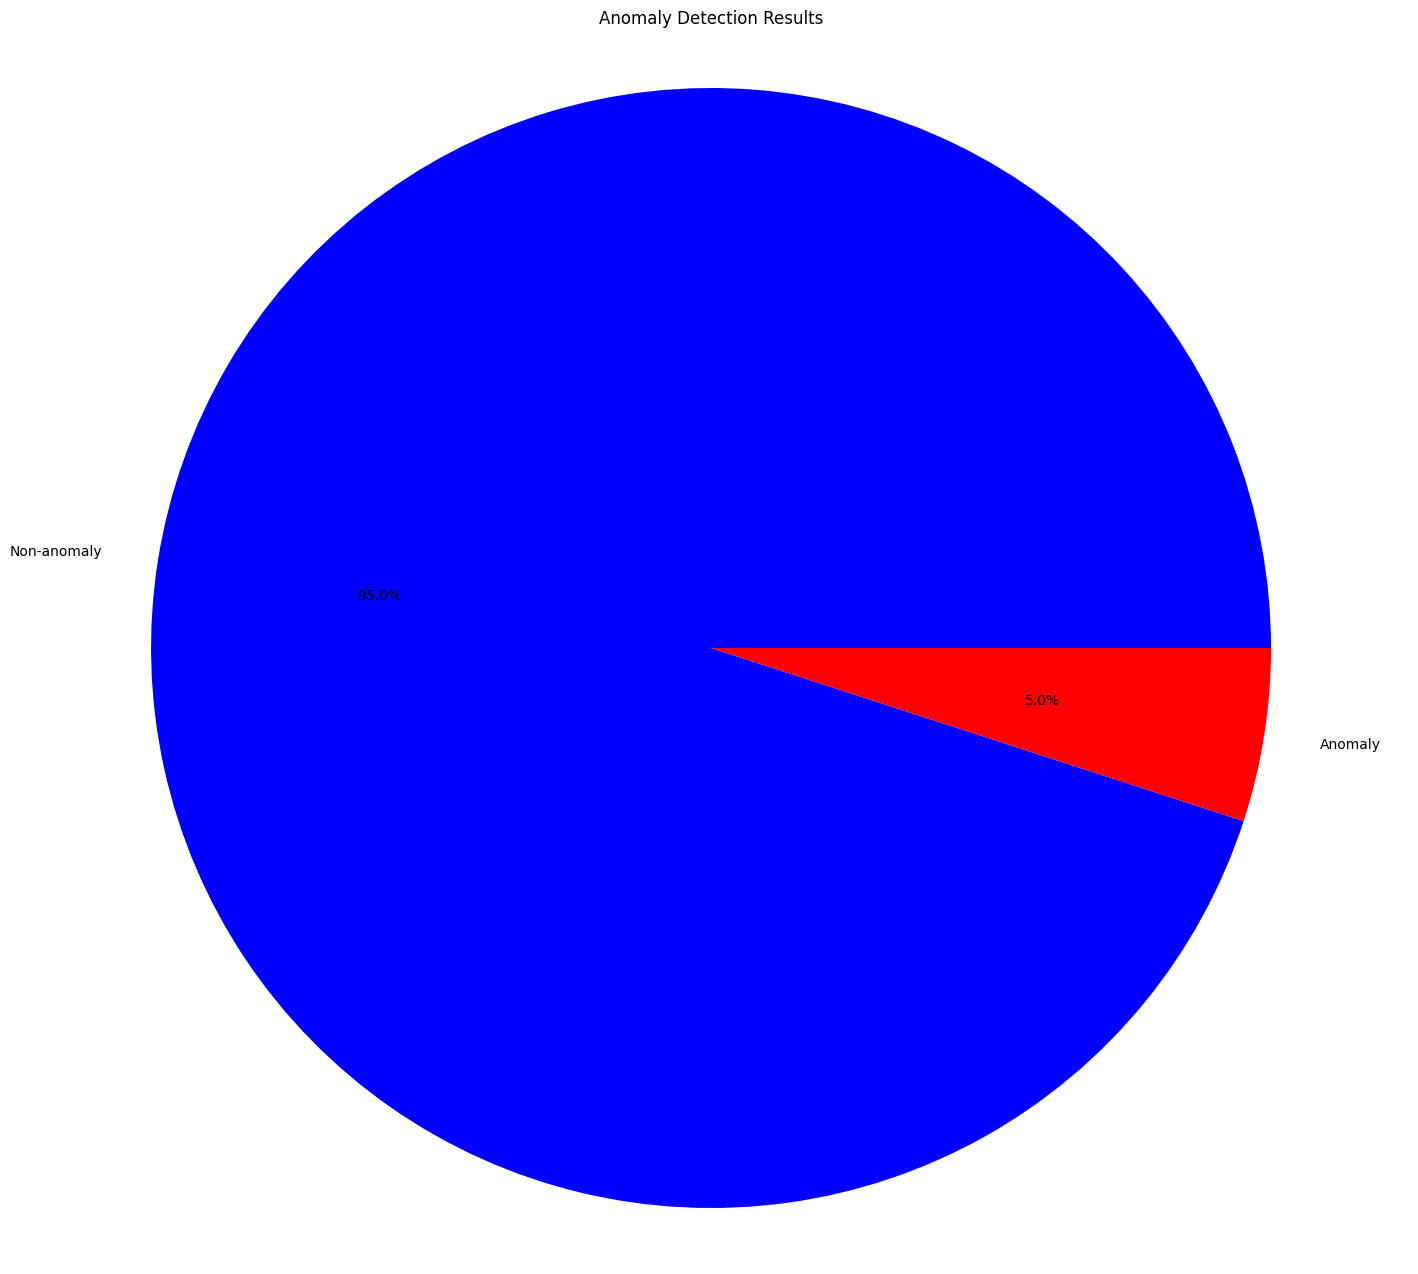

In [38]:
# Count the number of occurrences of each value in y_pred
counts = pd.Series(y_pred1).value_counts()

# Plot the results
labels = ['Non-anomaly', 'Anomaly']
colors = ['blue', 'red']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Anomaly Detection Results')
plt.show()


In [39]:
df_col['Outlier'] = np.where(y_pred1 == -1, -1, 1)



C:\Users\usman jalil\AppData\Local\Temp\ipykernel_43932\286950062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['Outlier'] = np.where(y_pred1 == -1, -1, 1)


In [40]:
# -1 telling have outlier and 1 predicting no outlier
df_col[df_col['Outlier']==-1]

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Outlier
10,2.15275,1011.00,14.000000,1.293620,526.75,21.0,1817.50,34.0,1196.75,445.25,10.075,60.474999,0.746495,-1
11,0.70000,1066.00,8.000000,1.133431,512.00,16.0,1918.00,28.0,1182.00,421.75,11.000,56.175000,0.736560,-1
25,6.90000,1775.50,461.000000,27.359807,1487.75,383.0,702.25,172.0,2332.50,1704.00,9.650,69.300001,0.831921,-1
26,6.10000,1640.00,401.000000,24.017757,1404.00,351.0,742.75,165.0,2191.25,1653.75,9.650,67.750000,0.813314,-1
34,2.15275,831.00,10.000000,1.068293,505.75,21.0,1892.75,32.0,1133.75,384.00,6.100,65.900002,0.624754,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073,6.20000,1615.50,218.811816,32.567320,1610.00,795.8,374.25,227.4,1908.50,2020.75,21.050,29.175000,0.719213,-1
9074,7.20000,1662.50,218.811816,31.995250,1597.00,874.1,365.75,229.8,1905.75,2159.00,19.475,35.625000,0.797771,-1
9097,5.90000,1726.25,218.811816,30.831733,1570.25,658.9,358.75,199.6,2021.00,1947.25,20.100,43.200000,1.005119,-1
9098,7.50000,1817.75,218.811816,35.469293,1674.50,846.5,329.75,232.3,2143.00,2128.75,18.800,49.050000,1.053762,-1


### Hyper Parameter Tuning 

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')


features = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T', 'RH', 'AH']

# Convert the dataframe to a numpy array
X = df[features].values

# Define the parameter grid to be searched
param_grid = {
    'n_estimators': [50, 100, 150],
    'contamination': [0.01, 0.1, 0.1]
}

# Create the Isolation Forest model
model = IsolationForest(random_state=42)

# Create the grid search object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search object to the data
grid_search.fit(X)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)

Best parameters: {'contamination': 0.01, 'n_estimators': 50}


In [52]:
from sklearn.ensemble import IsolationForest
import optuna


# Convert the dataframe to a numpy array
X = df[features].values

# Define the objective function to be optimized
def objective(trial):
    # Define the hyperparameters to be tuned
    n_estimators = trial.suggest_int('n_estimators', 50, 150)
    contamination = trial.suggest_float('contamination', 0.01, 0.1)

    # Create the Isolation Forest model with the specified hyperparameters
    model = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)

    # Fit the model to the data
    model.fit(X)

    # Predict the anomalies
    y_pred = model.predict(X)

    # Compute and return the anomaly score
    anomaly_score = np.mean(y_pred == -1)
    return -anomaly_score  # Optuna maximizes the objective, so we need to negate the score

# Create the Optuna study
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=10)

# Print the best hyperparameters and score
best_params = study.best_params
best_score = study.best_value
print("Best parameters:", best_params)


[I 2023-05-12 23:44:27,600] A new study created in memory with name: no-name-496650e9-af23-413c-9e68-0aa8c552ffd8
[I 2023-05-12 23:44:28,296] Trial 0 finished with value: -0.03676392005984824 and parameters: {'n_estimators': 134, 'contamination': 0.03672773277823176}. Best is trial 0 with value: -0.03676392005984824.
[I 2023-05-12 23:44:28,989] Trial 1 finished with value: -0.0766271240782302 and parameters: {'n_estimators': 122, 'contamination': 0.07658219198179664}. Best is trial 0 with value: -0.03676392005984824.
[I 2023-05-12 23:44:29,627] Trial 2 finished with value: -0.07491717430800471 and parameters: {'n_estimators': 132, 'contamination': 0.07488527878519785}. Best is trial 0 with value: -0.03676392005984824.
[I 2023-05-12 23:44:30,315] Trial 3 finished with value: -0.036015817035374584 and parameters: {'n_estimators': 148, 'contamination': 0.03597770681651746}. Best is trial 3 with value: -0.036015817035374584.
[I 2023-05-12 23:44:30,806] Trial 4 finished with value: -0.01175

Best parameters: {'n_estimators': 103, 'contamination': 0.011754305463939083}


# One Class SVM

In [ ]:
from sklearn.svm import OneClassSVM
# Select the features to be used for anomaly detection
features = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T', 'RH', 'AH']
X = df[features].values

# Create the One-Class SVM model
model = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
model.fit(X)
y_pred = model.predict(X)
anomalies = X[y_pred == -1]
anomalies

array([[2.60000000e+00, 1.36000000e+03, 1.50000000e+02, ...,
        1.35999999e+01, 4.88750010e+01, 7.57753825e-01],
       [2.00000000e+00, 1.29225000e+03, 1.12000000e+02, ...,
        1.33000000e+01, 4.76999998e+01, 7.25487449e-01],
       [2.20000000e+00, 1.40200000e+03, 8.80000000e+01, ...,
        1.19000001e+01, 5.39750004e+01, 7.50239067e-01],
       ...,
       [1.20000000e+00, 9.36250000e+02, 2.18811816e+02, ...,
        1.55500000e+01, 3.39499998e+01, 5.95666067e-01],
       [1.30000000e+00, 9.99750000e+02, 2.18811816e+02, ...,
        2.40000000e+01, 1.92749996e+01, 5.67283156e-01],
       [1.40000000e+00, 9.96000000e+02, 2.18811816e+02, ...,
        2.64500003e+01, 1.64499998e+01, 5.59414321e-01]])

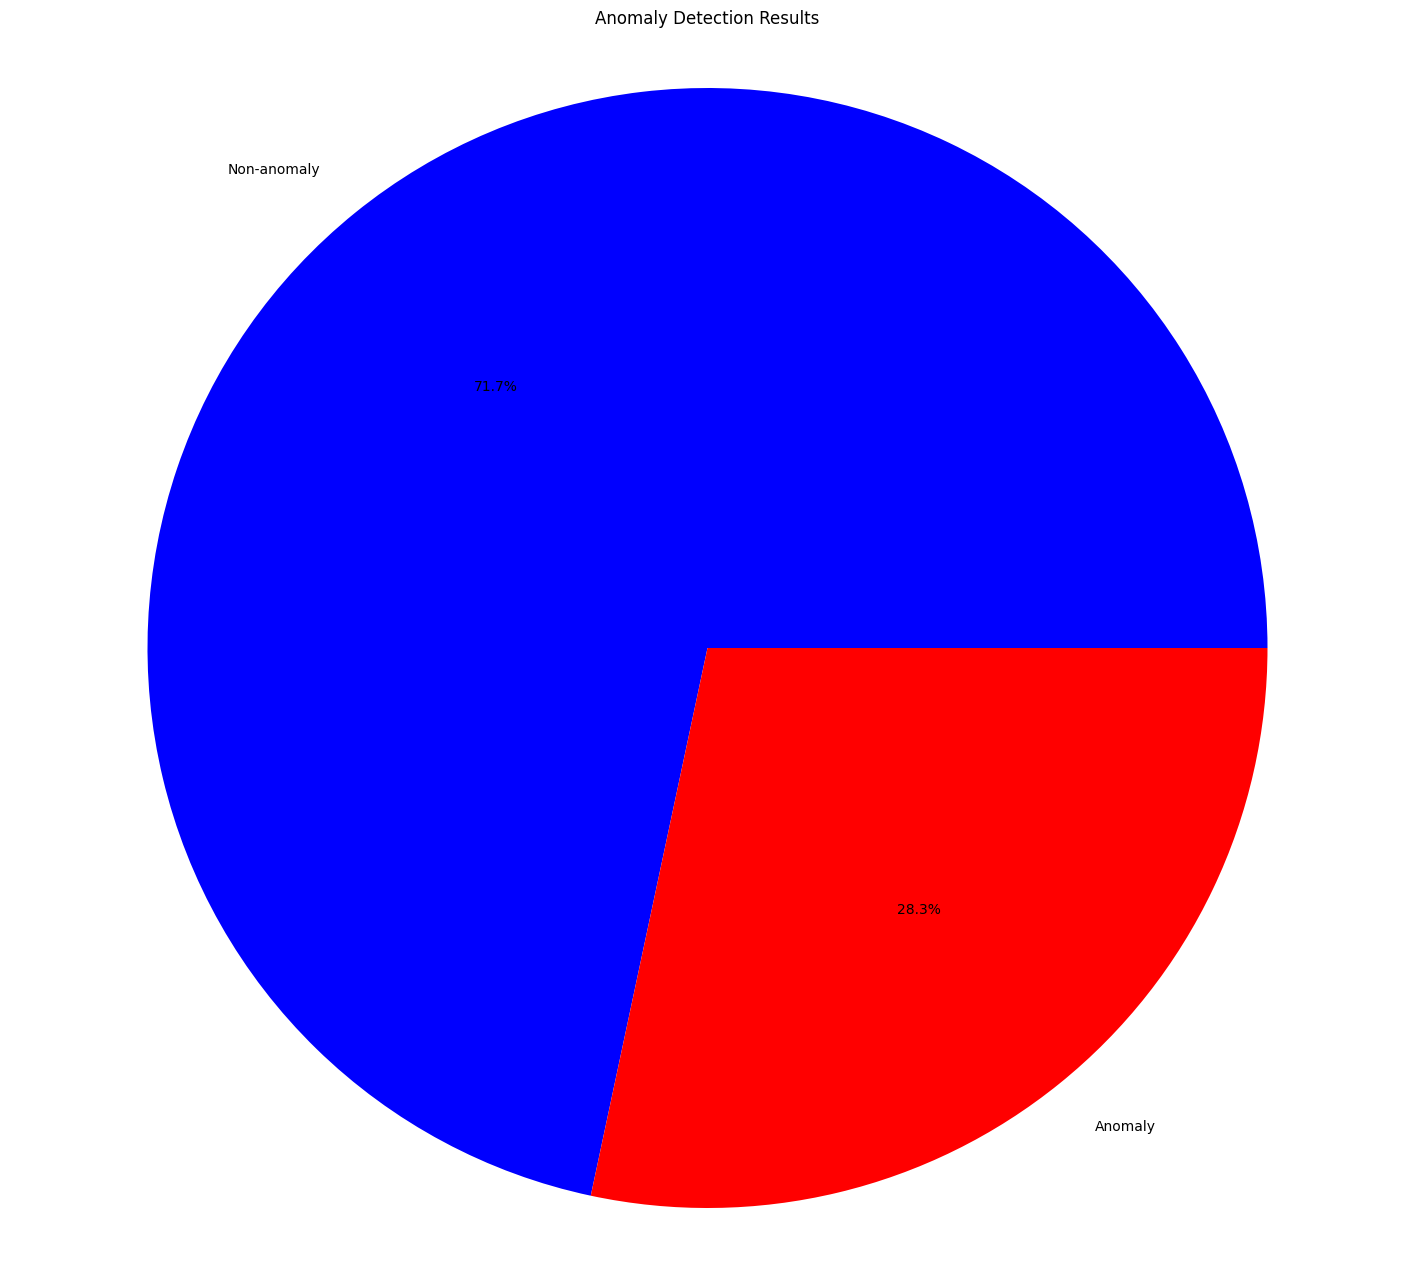

In [ ]:
# Count the number of occurrences of each value in y_pred
counts = pd.Series(y_pred).value_counts()

# Plot the results
labels = ['Non-anomaly', 'Anomaly']
colors = ['blue', 'red']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Anomaly Detection Results')
plt.show()

In [ ]:
df_col_svm = df[features]
df_col_svm

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,218.811816,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,218.811816,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,218.811816,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,218.811816,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [ ]:
df_col_svm['Outlier'] = np.where(y_pred == -1, -1, 1)

C:\Users\usman jalil\AppData\Local\Temp\ipykernel_37780\1505422489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_svm['Outlier'] = np.where(y_pred == -1, -1, 1)


In [ ]:
df_col_svm[df_col_svm['Outlier']==1]

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Outlier
131,0.6,937.00,17.000000,2.008743,584.75,38.0,1411.50,52.0,1348.00,792.50,12.750,63.225000,0.928290,1
132,0.9,1017.00,27.000000,3.482689,681.25,82.0,1245.75,64.0,1417.50,869.50,11.175,68.475000,0.908107,1
133,1.3,1171.25,50.000000,5.131232,770.00,99.0,1161.75,70.0,1466.75,930.00,10.975,66.500000,0.870523,1
134,3.4,1541.00,218.000000,16.174457,1185.00,263.0,770.00,97.0,1888.75,1406.50,11.675,63.650001,0.871937,1
135,3.7,1539.25,285.000000,19.663494,1287.00,229.0,697.50,95.0,2054.75,1507.00,13.625,56.299999,0.874265,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,218.811816,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,1
9353,2.4,1162.50,218.811816,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,1
9354,2.4,1142.00,218.811816,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,1
9355,2.1,1002.50,218.811816,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,1


### Hyper Parameter Tuning 

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
X = df[features].values
param_grid = {
    'nu': [0.01, 0.05, 0.1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto', 'scale']
}

# Create the One-Class SVM model
model = OneClassSVM()

# Create the grid search object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search object to the data
grid_search.fit(X)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)

Best parameters: {'gamma': 'auto', 'kernel': 'linear', 'nu': 0.01}


In [53]:

from sklearn.svm import OneClassSVM
import optuna

X = df[features].values

# Define the objective function to be optimized
def objective(trial):
    # Define the hyperparameters to be tuned
    nu = trial.suggest_uniform('nu', 0.01, 0.1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    gamma = trial.suggest_categorical('gamma', ['auto', 'scale'])

    # Create the OC-SVM model with the specified hyperparameters
    model = OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)

    # Fit the model to the data
    model.fit(X)

    # Predict the anomalies
    y_pred = model.predict(X)

    # Compute and return the anomaly score
    anomaly_score = np.mean(y_pred == -1)
    return -anomaly_score  # Optuna maximizes the objective, so we need to negate the score

# Create the Optuna study
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=2)

# Print the best hyperparameters and score
best_params = study.best_params
best_score = study.best_value
print("Best parameters:", best_params)


[I 2023-05-12 23:44:39,576] A new study created in memory with name: no-name-24cce228-649a-49df-b8e9-9e3ed84984a5
C:\Users\usman jalil\AppData\Local\Temp\ipykernel_43932\3182798264.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  nu = trial.suggest_uniform('nu', 0.01, 0.1)
[I 2023-05-12 23:44:39,794] Trial 0 finished with value: -0.04189376937052474 and parameters: {'nu': 0.04195723974339452, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 0 with value: -0.04189376937052474.
C:\Users\usman jalil\AppData\Local\Temp\ipykernel_43932\3182798264.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  nu = trial.suggest_uniform('nu', 0.01, 0.1)
[I 2023

Best parameters: {'nu': 0.04195723974339452, 'kernel': 'linear', 'gamma': 'scale'}
